In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\hi\Desktop\Data Analytics\Data Sets\new\python_learning_exam_performance.csv")
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [3]:
#checking for null values
df.isna().sum()

#droping null values
df = df.dropna()

#checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [4]:
df.debugging_sessions_per_week.unique()

array([ 4,  6,  3,  5,  2,  9,  8,  7,  1, 11,  0, 10, 14, 13, 12, 17])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         1938 non-null   int64  
 1   age                                1938 non-null   int64  
 2   country                            1938 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    1938 non-null   int64  
 5   hours_spent_learning_per_week      1938 non-null   float64
 6   practice_problems_solved           1938 non-null   int64  
 7   projects_completed                 1938 non-null   int64  
 8   tutorial_videos_watched            1938 non-null   int64  
 9   uses_kaggle                        1938 non-null   int64  
 10  participates_in_discussion_forums  1938 non-null   int64  
 11  debugging_sessions_per_week        1938 non-null   int64  
 1

# UNIVARIATE ANALYSIS

In [6]:
list(df.columns)

['student_id',
 'age',
 'country',
 'prior_programming_experience',
 'weeks_in_course',
 'hours_spent_learning_per_week',
 'practice_problems_solved',
 'projects_completed',
 'tutorial_videos_watched',
 'uses_kaggle',
 'participates_in_discussion_forums',
 'debugging_sessions_per_week',
 'self_reported_confidence_python',
 'final_exam_score',
 'passed_exam']

In [7]:
cat_columns = ['country','prior_programming_experience','uses_kaggle',
 'participates_in_discussion_forums','projects_completed','passed_exam']

In [8]:
# checking for abnomalies in categoric columns
for col in cat_columns:
    print(f'{col} Unique values:', df[col].unique())

country Unique values: ['Pakistan' 'India' 'Nigeria' 'Brazil' 'Bangladesh' 'Indonesia' 'USA'
 'Other' 'UK' 'Germany']
prior_programming_experience Unique values: ['Beginner' 'Intermediate' 'Advanced']
uses_kaggle Unique values: [0 1]
participates_in_discussion_forums Unique values: [1 0]
projects_completed Unique values: [1 2 0 3 4 5 6 7]
passed_exam Unique values: [0 1]


### Bar Chart Distribution of Categoric Columns

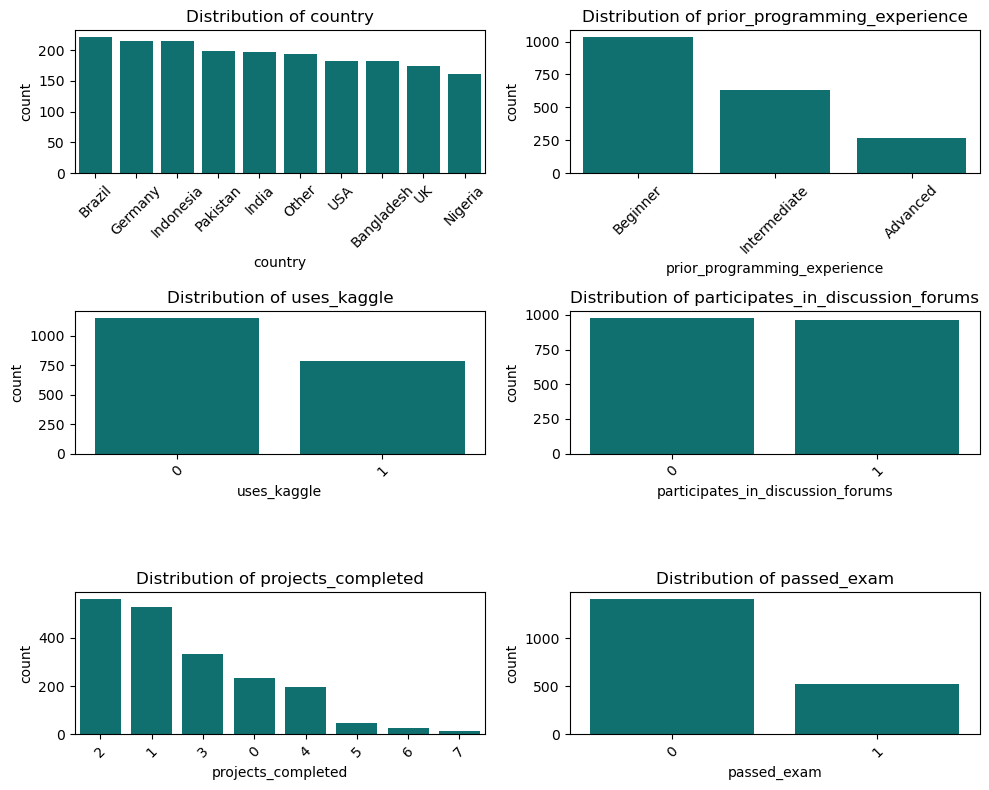

In [9]:
# plotting categoric values using a bar chart
# creating axes
cat_columns = ['country','prior_programming_experience','uses_kaggle','participates_in_discussion_forums','projects_completed','passed_exam']
fig, axes=plt.subplots(3,2, figsize=(10,8))
axes = axes.flatten()




for i, col in enumerate(cat_columns):
    
    #create order
    ordered_df = df[col].value_counts(ascending=False).index
    
    #create a plot 
    sns.countplot(data=df, x=col,  ax=axes[i], order=ordered_df, color='teal')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Distribution of Numeric Columns

In [10]:
df.columns

Index(['student_id', 'age', 'country', 'prior_programming_experience',
       'weeks_in_course', 'hours_spent_learning_per_week',
       'practice_problems_solved', 'projects_completed',
       'tutorial_videos_watched', 'uses_kaggle',
       'participates_in_discussion_forums', 'debugging_sessions_per_week',
       'self_reported_confidence_python', 'final_exam_score', 'passed_exam'],
      dtype='object')

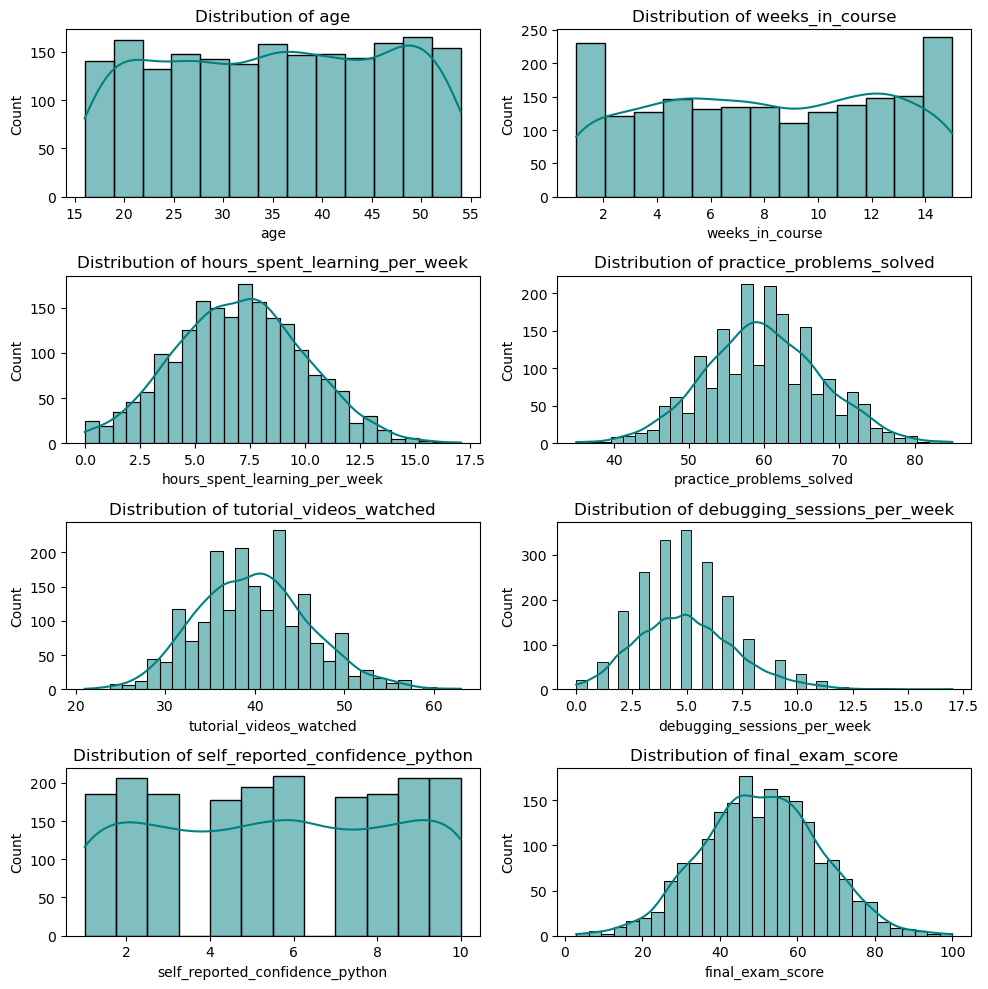

In [11]:
numeric_columns = ['age','weeks_in_course','hours_spent_learning_per_week','practice_problems_solved','tutorial_videos_watched',
                  'debugging_sessions_per_week','self_reported_confidence_python','final_exam_score']
# plotting graphs
fig, ax= plt.subplots(4,2, figsize=(10,10))
ax=ax.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col],kde=True,ax=ax[i],color='teal')
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
    

# BIVARIATE ANALYSIS

In [12]:
# factors affecting the final score of the students

In [13]:
list(df.columns)

['student_id',
 'age',
 'country',
 'prior_programming_experience',
 'weeks_in_course',
 'hours_spent_learning_per_week',
 'practice_problems_solved',
 'projects_completed',
 'tutorial_videos_watched',
 'uses_kaggle',
 'participates_in_discussion_forums',
 'debugging_sessions_per_week',
 'self_reported_confidence_python',
 'final_exam_score',
 'passed_exam']

In [14]:
# which columns impacted the final performance?
impact_columns = ['country','prior_programming_experience','uses_kaggle',
 'participates_in_discussion_forums','projects_completed']

## Insights on those who passed exams

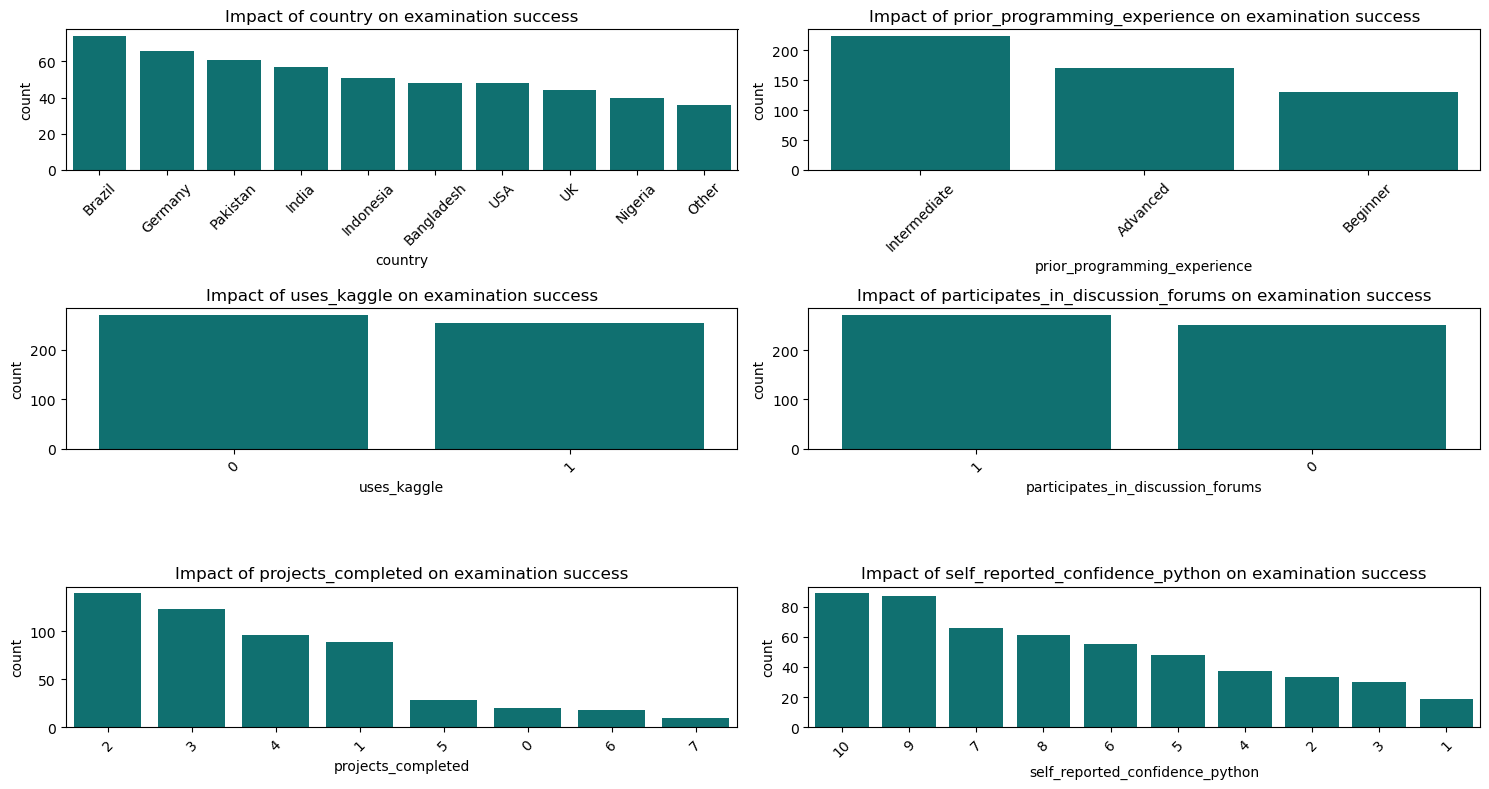

In [15]:
# columns to check for the impact
impact_columns = ['country','prior_programming_experience','uses_kaggle',
 'participates_in_discussion_forums','projects_completed','self_reported_confidence_python']

#new dataframe for the students who passed
passed_df = df[df['passed_exam'] == 1].reset_index()

#creating the order of plot from the highest to lowest
ord = passed_df.groupby('projects_completed')['passed_exam'].sum().sort_values(ascending=False).index

#creating axis for each plot
fig, ax=plt.subplots(3,2, figsize=(15,8))
ax=ax.flatten()

for i, col in enumerate(impact_columns):
    order=passed_df.groupby(col)['passed_exam'].sum().sort_values(ascending=False).index
    sns.countplot(data=passed_df, x=col, ax=ax[i], order=order,color='teal')
    ax[i].set_title(f'Impact of {col} on examination success')
    ax[i].tick_params(axis='x', rotation=45)

# remove empty ax
for ax in ax.flatten():
    if not ax.has_data():
        ax.remove()


plt.tight_layout()
plt.show()

## Insights on those who failed exams

In [16]:
# filtering datafram to only those who failed
failed_df = df.loc[df['passed_exam'] == 0].copy()
failed_df.loc[:, 'count'] = 1


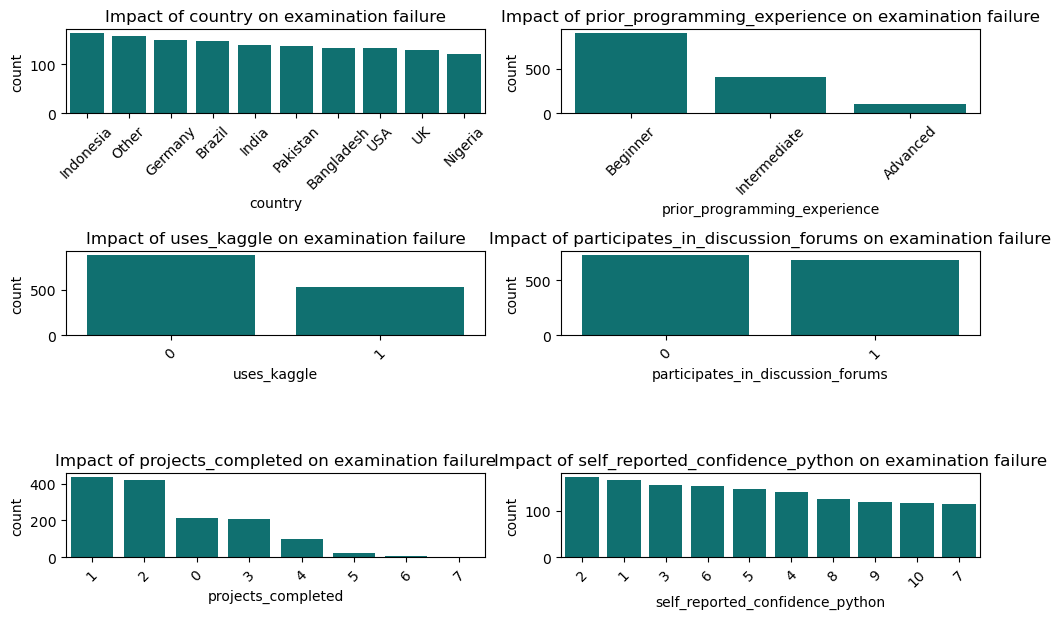

In [17]:
# columns to check for the impact
impact_columns = ['country','prior_programming_experience','uses_kaggle',
 'participates_in_discussion_forums','projects_completed','self_reported_confidence_python']

fig, ax=plt.subplots(4,2, figsize=(10,8))
ax=ax.flatten()

for i, col in enumerate(impact_columns):
    order=failed_df.groupby(col)['count'].sum().sort_values(ascending=False).index
    sns.countplot(data=failed_df, x=col, ax=ax[i], order=order, color='teal')
    ax[i].set_title(f'Impact of {col} on examination failure')
    ax[i].tick_params(axis='x', rotation=45)

# remove empty ax
for ax in ax.flatten():
    if not ax.has_data():
        ax.remove()


plt.tight_layout()
plt.show()

## Numeric columns impact on final score

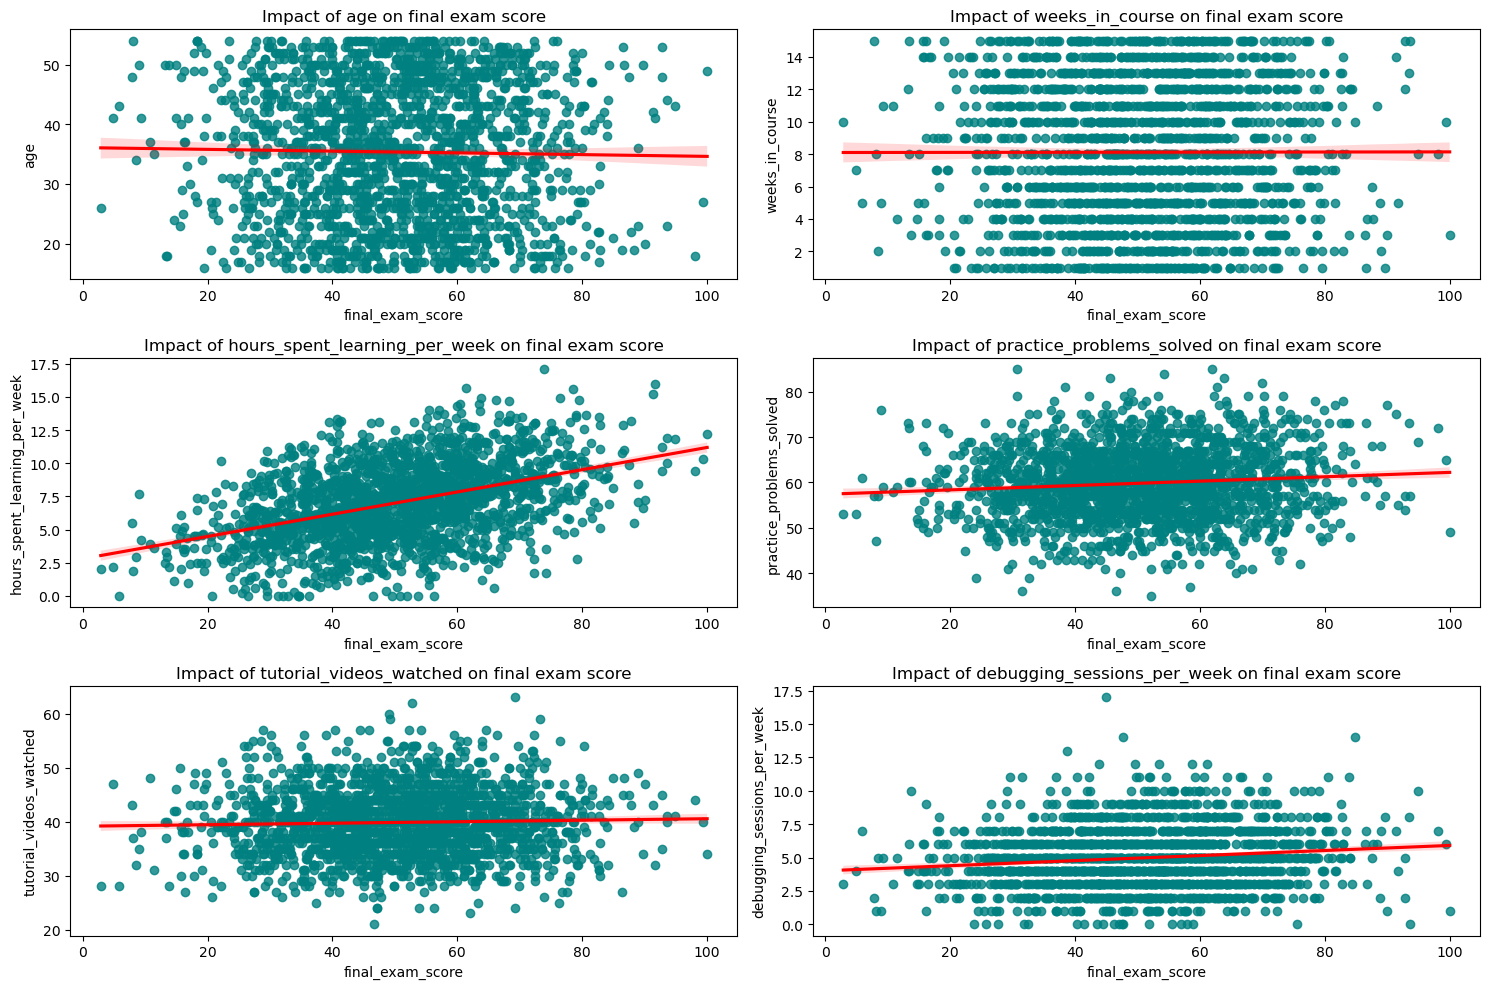

In [20]:
# creating list of numeric columns
numeric_columns = ['age','weeks_in_course','hours_spent_learning_per_week','practice_problems_solved','tutorial_videos_watched',
                  'debugging_sessions_per_week']

# creating axes for the plot
fig, ax=plt.subplots(3,2, figsize=(15,10))
ax=ax.flatten()

#creating a loop to plot all the numeric columns against the final examination score
for i, col in enumerate(numeric_columns):
    sns.regplot(data=df, x='final_exam_score', y=col, color='teal',line_kws={'color':'red'}, ax=ax[i])
    ax[i].set_title(f'Impact of {col} on final exam score')

plt.tight_layout()
plt.show()

